<a href="https://colab.research.google.com/github/gmpandolfo/credit-card-default-prediction/blob/master/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================
# 1. Configurações iniciais
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
# === 2. Carregando o dataset ===
from google.colab import files
uploaded = files.upload()

# Carrega o CSV
df = pd.read_csv("UCI_Credit_Card.csv")

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
# === 3. Exploração inicial do dataset ===
df.head()
df.info()
df.describe()
df.isnull().sum() #checa null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
# =========================
# 4. Pré-processamento
# =========================
# Remover coluna irrelevante
df = df.drop(columns=['ID'])

# Corrigir valores inconsistentes
df['EDUCATION'] = df['EDUCATION'].replace({0:4, 5:4, 6:4})
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

# Separar features e target
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

=== Logistic Regression ===
Accuracy: 0.8077777777777778
Confusion Matrix:
 [[6800  209]
 [1521  470]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.69      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

AUC-ROC: 0.715


=== Decision Tree ===
Accuracy: 0.7223333333333334
Confusion Matrix:
 [[5715 1294]
 [1205  786]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      7009
           1       0.38      0.39      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.72      9000

AUC-ROC: 0.605


=== Random Forest ===
Accuracy: 0.8163333333333334
Confusion Mat

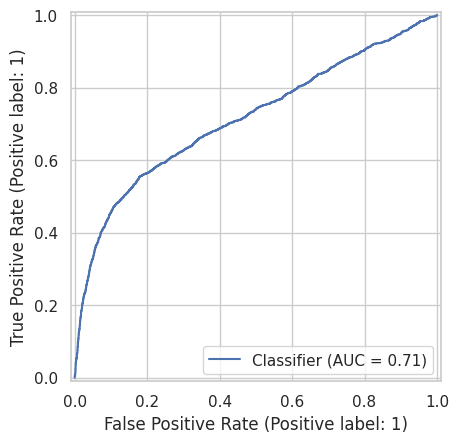

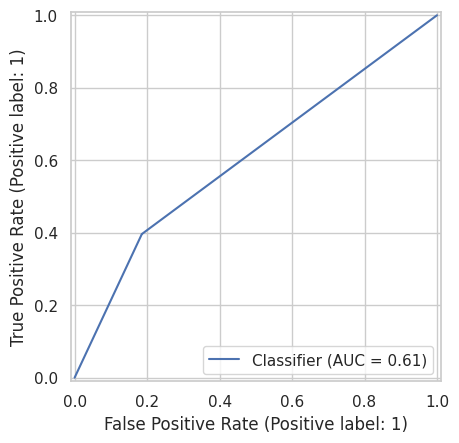

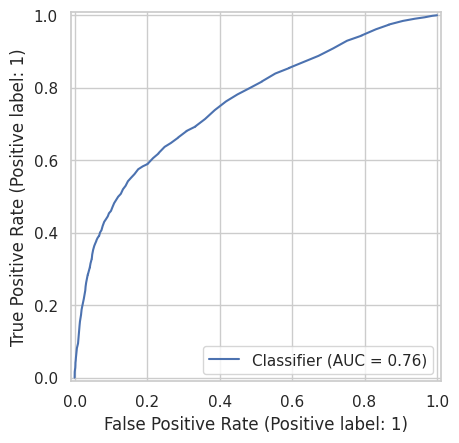

In [ ]:
# =========================
# 5. Treinamento de modelos
# =========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        print(f"AUC-ROC: {auc:.3f}")
        RocCurveDisplay.from_predictions(y_test, y_pred_proba)

    print("\n")

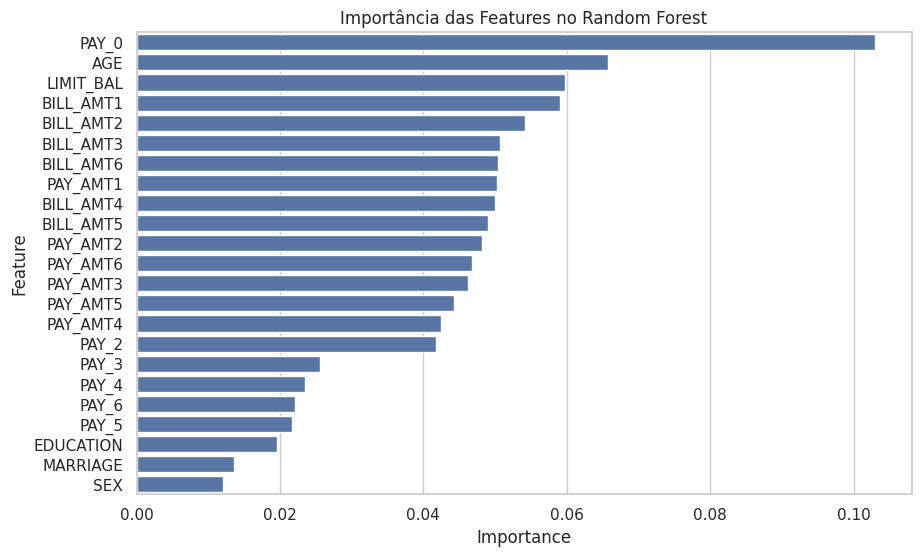

In [ ]:
# =========================
# 6. Análise de risco
# =========================
# Usando Random Forest para identificar variáveis mais importantes
rf = models["Random Forest"]
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plotar gráfico de importância
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Importância das Features no Random Forest")
plt.show()

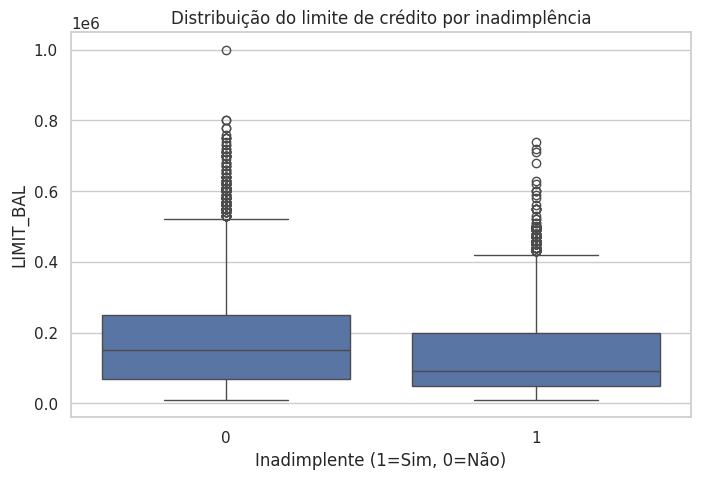

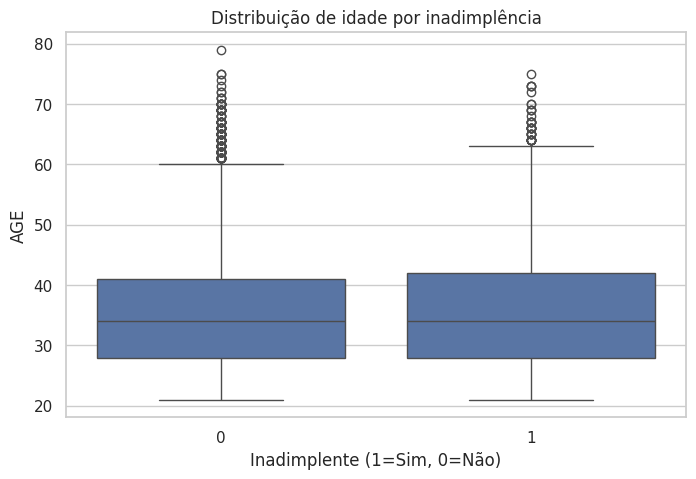

In [ ]:
# =========================
# 7. Análise exploratória de risco
# =========================
# Relação entre limite de crédito e inadimplência
plt.figure(figsize=(8,5))
sns.boxplot(x=y, y=df['LIMIT_BAL'])
plt.title("Distribuição do limite de crédito por inadimplência")
plt.xlabel("Inadimplente (1=Sim, 0=Não)")
plt.ylabel("LIMIT_BAL")
plt.show()

# Relação entre idade e inadimplência
plt.figure(figsize=(8,5))
sns.boxplot(x=y, y=df['AGE'])
plt.title("Distribuição de idade por inadimplência")
plt.xlabel("Inadimplente (1=Sim, 0=Não)")
plt.ylabel("AGE")
plt.show()